<a href="https://colab.research.google.com/github/AditiG10/Classification-of-COVID-19-chest-X-ray-images/blob/covid_infected_train/covid19_variousArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 331 (delta 5), reused 0 (delta 0), pack-reused 319
Receiving objects: 100% (331/331), 80.94 MiB | 36.15 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [26]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/Classification-of-COVID-19-chest-X-ray-images


In [27]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/Classification-of-COVID-19-chest-X-ray-images/dataset


In [28]:
cd training

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/Classification-of-COVID-19-chest-X-ray-images/dataset/training


In [29]:
!ls

infected  normal


In [0]:
train_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal'
train_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected'
test_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal'
test_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected'
evaluate_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal'
evaluate_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected'

In [31]:
print('train_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal')))
print('train_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected')))
print('test_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal')))
print('test_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected')))
print('evaluate_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal')))
print('evaluate_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected')))

train_normal cases  97
train_infected cases  90
test_normal cases  69
test_infected cases  25
evaluate_normal cases  1
evaluate_infected cases  1


In [0]:
IMAGE_SIZE = (224,224)
DIR_NAME = '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [33]:
imagePaths

['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected/1.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal/1.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train12.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train15.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train21.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train20.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train3.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train13.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train62.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train

In [34]:
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

error: ignored

In [0]:
data.shape

In [0]:
labels

In [0]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,	rotation_range=15,
	fill_mode="nearest")

In [0]:
trainAug

In [0]:
trainX.shape,testX.shape,trainY.shape,testY.shape

**ResNet50**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#construct the head of the model that will be placed on top of the
#the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False



In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)




In [44]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 44s 2s/step - loss: 0.6125 - accuracy: 0.6027 - val_loss: 0.5612 - val_accuracy: 0.8596
Epoch 2/25
28/28 [==============================] - 42s 1s/step - loss: 0.6468 - accuracy: 0.5963 - val_loss: 0.5589 - val_accuracy: 0.7544
Epoch 3/25
28/28 [==============================] - 42s 1s/step - loss: 0.6177 - accuracy: 0.6330 - val_loss: 0.5637 - val_accuracy: 0.9123
Epoch 4/25
28/28 [==============================] - 42s 1s/step - loss: 0.6380 - accuracy: 0.6101 - val_loss: 0.5678 - val_accuracy: 0.8947
Epoch 5/25
28/28 [==============================] - 42s 2s/step - loss: 0.6222 - accuracy: 0.6468 - val_loss: 0.5602 - val_accuracy: 0.8947
Epoch 6/25
28/28 [==============================] - 41s 1s/step - loss: 0.6135 - accuracy: 0.6193 - val_loss: 0.5478 - val_accuracy: 0.7368
Epoch 7/25
28/28 [==============================] - 41s 1s/step - loss: 0.5941 - accuracy: 0.6284 - val_loss: 

In [48]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.96      0.96      0.96        23
      normal       0.97      0.97      0.97        34

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [49]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[22  1]
 [ 1 33]]
acc: 0.9649
sensitivity: 0.9565
specificity: 0.9706


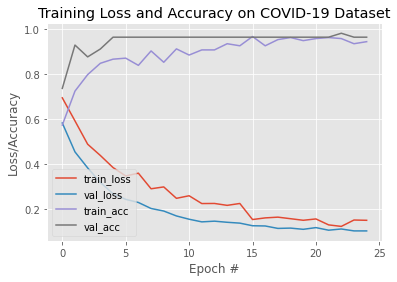

In [50]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**VGG-16**

In [45]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [47]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 134s 5s/step - loss: 0.6948 - accuracy: 0.5734 - val_loss: 0.5827 - val_accuracy: 0.7368
Epoch 2/25
28/28 [==============================] - 134s 5s/step - loss: 0.5921 - accuracy: 0.7248 - val_loss: 0.4540 - val_accuracy: 0.9298
Epoch 3/25
28/28 [==============================] - 136s 5s/step - loss: 0.4882 - accuracy: 0.7982 - val_loss: 0.3828 - val_accuracy: 0.8772
Epoch 4/25
28/28 [==============================] - 134s 5s/step - loss: 0.4382 - accuracy: 0.8486 - val_loss: 0.3184 - val_accuracy: 0.9123
Epoch 5/25
28/28 [==============================] - 134s 5s/step - loss: 0.3843 - accuracy: 0.8670 - val_loss: 0.2678 - val_accuracy: 0.9649
Epoch 6/25
28/28 [==============================] - 134s 5s/step - loss: 0.3469 - accuracy: 0.8716 - val_loss: 0.2427 - val_accuracy: 0.9649
Epoch 7/25
28/28 [==============================] - 137s 5s/step - loss: 0.3593 - accuracy: 0.8394 - val

In [54]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.96      0.96      0.96        23
      normal       0.97      0.97      0.97        34

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [55]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[22  1]
 [ 1 33]]
acc: 0.9649
sensitivity: 0.9565
specificity: 0.9706


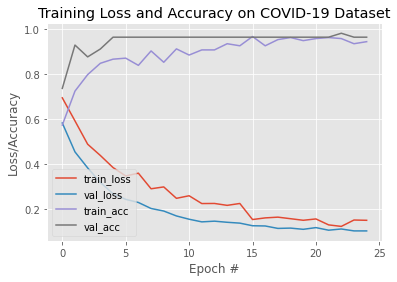

In [56]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**Inception-V3**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [61]:
baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#construct the head of the model that will be placed on top of the
#the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [64]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 32s 1s/step - loss: 0.9032 - accuracy: 0.6161 - val_loss: 0.4095 - val_accuracy: 0.7895
Epoch 2/25
28/28 [==============================] - 30s 1s/step - loss: 0.4345 - accuracy: 0.8073 - val_loss: 0.2270 - val_accuracy: 0.8596
Epoch 3/25
28/28 [==============================] - 30s 1s/step - loss: 0.3465 - accuracy: 0.8670 - val_loss: 0.2627 - val_accuracy: 0.8947
Epoch 4/25
28/28 [==============================] - 32s 1s/step - loss: 0.2415 - accuracy: 0.8991 - val_loss: 0.2669 - val_accuracy: 0.8947
Epoch 5/25
28/28 [==============================] - 30s 1s/step - loss: 0.2998 - accuracy: 0.8945 - val_loss: 0.2047 - val_accuracy: 0.8947
Epoch 6/25
28/28 [==============================] - 29s 1s/step - loss: 0.2927 - accuracy: 0.8761 - val_loss: 0.2210 - val_accuracy: 0.9123
Epoch 7/25
28/28 [==============================] - 30s 1s/step - loss: 0.2255 - accuracy: 0.9220 - val_loss: 

In [65]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.83      0.88        23
      normal       0.89      0.97      0.93        34

    accuracy                           0.91        57
   macro avg       0.92      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



In [66]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  4]
 [ 1 33]]
acc: 0.9123
sensitivity: 0.8261
specificity: 0.9706


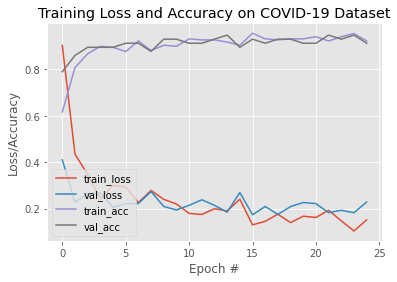

In [67]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**Xception**

In [0]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [70]:
pip install tf-explain

     |████████████████████████████████| 51kB 1.9MB/s 


In [0]:
#import librariesimport numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [73]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model Xception
baseModel = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


Xception_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [74]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
Xception_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = Xception_model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 55s 2s/step - loss: 0.5705 - accuracy: 0.6881 - val_loss: 0.3315 - val_accuracy: 0.8772
Epoch 2/25
28/28 [==============================] - 55s 2s/step - loss: 0.2450 - accuracy: 0.9358 - val_loss: 0.2258 - val_accuracy: 0.8772
Epoch 3/25
28/28 [==============================] - 54s 2s/step - loss: 0.2423 - accuracy: 0.9037 - val_loss: 0.1922 - val_accuracy: 0.9123
Epoch 4/25
28/28 [==============================] - 54s 2s/step - loss: 0.1721 - accuracy: 0.9312 - val_loss: 0.1742 - val_accuracy: 0.9298
Epoch 5/25
28/28 [==============================] - 56s 2s/step - loss: 0.1373 - accuracy: 0.9495 - val_loss: 0.1526 - val_accuracy: 0.9474
Epoch 6/25
28/28 [==============================] - 54s 2s/step - loss: 0.1353 - accuracy: 0.9495 - val_loss: 0.1528 - val_accuracy: 0.9474
Epoch 7/25
28/28 [==============================] - 54s 2s/step - loss: 0.1442 - accuracy: 0.9495 - val_loss: 

In [75]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.83      0.88        23
      normal       0.89      0.97      0.93        34

    accuracy                           0.91        57
   macro avg       0.92      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



In [76]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  4]
 [ 1 33]]
acc: 0.9123
sensitivity: 0.8261
specificity: 0.9706


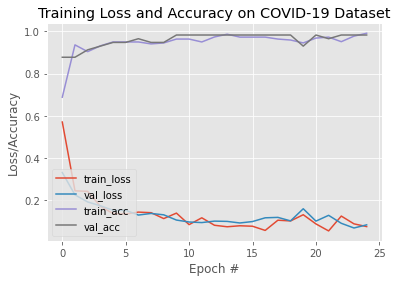

In [77]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**InceptionResNet- V2**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionResNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [79]:
baseModel = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#construct the head of the model that will be placed on top of the
#the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

219062272/219055592 [==============================] - 2s 0us/step


In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [81]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 70s 2s/step - loss: 1.0732 - accuracy: 0.5780 - val_loss: 0.2652 - val_accuracy: 0.9474
Epoch 2/25
28/28 [==============================] - 65s 2s/step - loss: 0.4942 - accuracy: 0.7706 - val_loss: 0.2731 - val_accuracy: 0.8772
Epoch 3/25
28/28 [==============================] - 66s 2s/step - loss: 0.3898 - accuracy: 0.8119 - val_loss: 0.2191 - val_accuracy: 0.9298
Epoch 4/25
28/28 [==============================] - 65s 2s/step - loss: 0.3529 - accuracy: 0.8578 - val_loss: 0.2783 - val_accuracy: 0.8772
Epoch 5/25
28/28 [==============================] - 65s 2s/step - loss: 0.3555 - accuracy: 0.8670 - val_loss: 0.2123 - val_accuracy: 0.9298
Epoch 6/25
28/28 [==============================] - 64s 2s/step - loss: 0.3291 - accuracy: 0.8624 - val_loss: 0.2445 - val_accuracy: 0.9123
Epoch 7/25
28/28 [==============================] - 65s 2s/step - loss: 0.3171 - accuracy: 0.8807 - val_loss: 

In [82]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      0.78      0.88        23
      normal       0.87      1.00      0.93        34

    accuracy                           0.91        57
   macro avg       0.94      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57



In [83]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[18  5]
 [ 0 34]]
acc: 0.9123
sensitivity: 0.7826
specificity: 1.0000


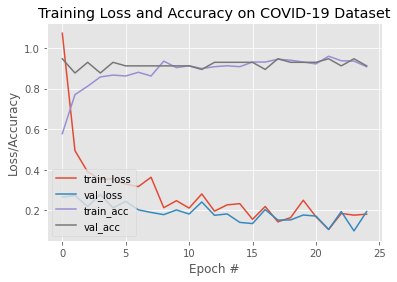

In [84]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**NasNetLarge**

In [0]:
from tensorflow.keras.applications.nasnet import NASNetLarge

In [86]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.NASNetLarge(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

343613440/343610240 [==============================] - 3s 0us/step


In [87]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 164s 6s/step - loss: 0.5710 - accuracy: 0.7523 - val_loss: 0.2878 - val_accuracy: 0.8596
Epoch 2/25
28/28 [==============================] - 157s 6s/step - loss: 0.2370 - accuracy: 0.9266 - val_loss: 0.1984 - val_accuracy: 0.9298
Epoch 3/25
28/28 [==============================] - 155s 6s/step - loss: 0.2823 - accuracy: 0.8899 - val_loss: 0.1362 - val_accuracy: 0.9649
Epoch 4/25
28/28 [==============================] - 155s 6s/step - loss: 0.2743 - accuracy: 0.9037 - val_loss: 0.1323 - val_accuracy: 0.9649
Epoch 5/25
28/28 [==============================] - 154s 6s/step - loss: 0.2165 - accuracy: 0.9128 - val_loss: 0.1444 - val_accuracy: 0.9649
Epoch 6/25
28/28 [==============================] - 154s 6s/step - loss: 0.2066 - accuracy: 0.9174 - val_loss: 0.1108 - val_accuracy: 0.9825
Epoch 7/25
28/28 [==============================] - 157s 6s/step - loss: 0.1675 - accuracy: 0.9358 - val

In [88]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      0.96      0.98        23
      normal       0.97      1.00      0.99        34

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



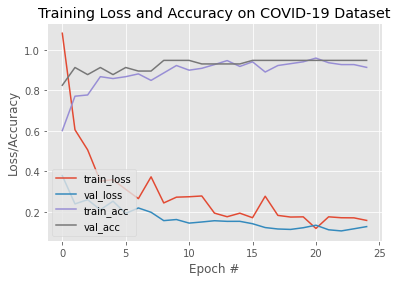

In [99]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**MobileNet-V2**

In [0]:
import tensorflow as tf


In [93]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [95]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 12s 428ms/step - loss: 1.0813 - accuracy: 0.6009 - val_loss: 0.3787 - val_accuracy: 0.8246
Epoch 2/25
28/28 [==============================] - 11s 407ms/step - loss: 0.6051 - accuracy: 0.7706 - val_loss: 0.2393 - val_accuracy: 0.9123
Epoch 3/25
28/28 [==============================] - 12s 415ms/step - loss: 0.5058 - accuracy: 0.7768 - val_loss: 0.2601 - val_accuracy: 0.8772
Epoch 4/25
28/28 [==============================] - 11s 407ms/step - loss: 0.3518 - accuracy: 0.8670 - val_loss: 0.2104 - val_accuracy: 0.9123
Epoch 5/25
28/28 [==============================] - 11s 398ms/step - loss: 0.3587 - accuracy: 0.8578 - val_loss: 0.2526 - val_accuracy: 0.8772
Epoch 6/25
28/28 [==============================] - 11s 396ms/step - loss: 0.3111 - accuracy: 0.8670 - val_loss: 0.1925 - val_accuracy: 0.9123
Epoch 7/25
28/28 [==============================] - 11s 407ms/step - loss: 0.2654 - accuracy

In [96]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.91      0.93        23
      normal       0.94      0.97      0.96        34

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



In [97]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[21  2]
 [ 1 33]]
acc: 0.9474
sensitivity: 0.9130
specificity: 0.9706


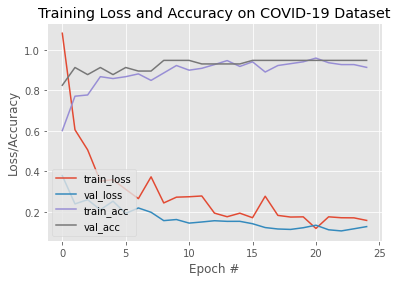

In [98]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**DenseNet201**

In [0]:
from tensorflow.keras.applications import DenseNet201

In [101]:
IMG_SHAPE = (224,224,3)


baseModel = tf.keras.applications.DenseNet201(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


DenseNet201_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

74842112/74836368 [==============================] - 1s 0us/step


In [106]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
DenseNet201_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = DenseNet201_model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])



[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 60s 2s/step - loss: 0.8742 - accuracy: 0.6101 - val_loss: 0.4089 - val_accuracy: 0.8596
Epoch 2/25
28/28 [==============================] - 57s 2s/step - loss: 0.5365 - accuracy: 0.7523 - val_loss: 0.3098 - val_accuracy: 0.8947
Epoch 3/25
28/28 [==============================] - 57s 2s/step - loss: 0.4298 - accuracy: 0.8073 - val_loss: 0.2463 - val_accuracy: 0.8947
Epoch 4/25
28/28 [==============================] - 58s 2s/step - loss: 0.3859 - accuracy: 0.8440 - val_loss: 0.2214 - val_accuracy: 0.8947
Epoch 5/25
28/28 [==============================] - 58s 2s/step - loss: 0.2878 - accuracy: 0.8991 - val_loss: 0.2034 - val_accuracy: 0.8947
Epoch 6/25
28/28 [==============================] - 57s 2s/step - loss: 0.2877 - accuracy: 0.8807 - val_loss: 0.1970 - val_accuracy: 0.8947
Epoch 7/25
28/28 [==============================] - 58s 2s/step - loss: 0.2454 - accuracy: 0.8899 - val_loss: 

In [107]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = DenseNet201_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))




[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.87      0.91        23
      normal       0.92      0.97      0.94        34

    accuracy                           0.93        57
   macro avg       0.93      0.92      0.93        57
weighted avg       0.93      0.93      0.93        57



In [108]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[20  3]
 [ 1 33]]
acc: 0.9298
sensitivity: 0.8696
specificity: 0.9706


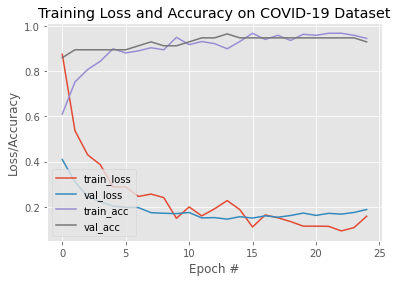

In [109]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**ResNet152-V2**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet152V2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [113]:
res =ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [114]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 3e-4
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 108s 4s/step - loss: 0.6396 - accuracy: 0.8761 - val_loss: 0.2669 - val_accuracy: 0.9649
Epoch 2/25
28/28 [==============================] - 106s 4s/step - loss: 0.1907 - accuracy: 0.9495 - val_loss: 0.3475 - val_accuracy: 0.9474
Epoch 3/25
28/28 [==============================] - 108s 4s/step - loss: 0.1270 - accuracy: 0.9725 - val_loss: 0.6050 - val_accuracy: 0.9123
Epoch 4/25
28/28 [==============================] - 107s 4s/step - loss: 0.1704 - accuracy: 0.9725 - val_loss: 0.4952 - val_accuracy: 0.9298
Epoch 5/25
28/28 [==============================] - 108s 4s/step - loss: 0.0787 - accuracy: 0.9908 - val_loss: 0.1953 - val_accuracy: 0.9474
Epoch 6/25
28/28 [==============================] - 107s 4s/step - loss: 0.0218 - accuracy: 0.9908 - val_loss: 0.2955 - val_accuracy: 0.9474
Epoch 7/25
28/28 [==============================] - 107s 4s/step - loss: 0.1732 - accuracy: 0.9817 - val

In [115]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = DenseNet201_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))




[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.87      0.91        23
      normal       0.92      0.97      0.94        34

    accuracy                           0.93        57
   macro avg       0.93      0.92      0.93        57
weighted avg       0.93      0.93      0.93        57



In [116]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  3]
 [ 1 33]]
acc: 0.9298
sensitivity: 0.8696
specificity: 0.9706


ValueError: ignored

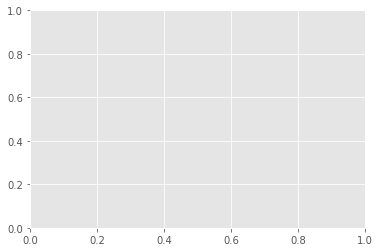

In [117]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])